In [1]:
import os
import numpy as np
import qutip as qt
import matplotlib
import matplotlib.pyplot as plt
import math

%config InlineBackend.figure_formats = ['svg']
plt.rcParams['axes.linewidth'] = 1.0

# Numerical form of the phase operator

Author: Tien D. Nguyen (QCMX)

We now consider a logical qubit formed by $|g\rangle$ and $|e\rangle$ states. These are now our logical $|\bar{0}\rangle$ and $|\bar{1}\rangle$. We try to elucidate which types of operators can and cannot induce transitions between the two states of the qubit.

Before going any further, we see that there's two operators that we need to think about. The first operator being Cooper-pair number operator $\hat{N}$. This operator is easily represented in the charge basis,
\begin{align}
\hat{N} = \sum_{N=-\infty}^{\infty} N|N\rangle\langle N|.
\end{align}
Representing the other one, superconducting phase operator $\hat{\varphi}$, in the charge basis is of a much more daunting task. We have several options. Let's explore them individually.

### Taking the logarithm

First, since we know how to represent $e^{i\hat\varphi}=\sum_{N}|N+1\rangle\langle N|$, we hope that we can actually find
\begin{align}
\log[e^{i\hat{\varphi}}] = \log[\sum_{-\infty}^{\infty}|N+1\rangle\langle N|]\rightarrow \hat{\varphi}=\frac{1}{i}\log[\sum_{-\infty}^{\infty}|N+1\rangle\langle N|]=\frac{1}{i}\log{M}.
\end{align}
The logarithm of the matrix ${M}=\sum_{-\infty}^{\infty}|N+1\rangle\langle N|$ actually can be found as follow. Assume that we can diagonalize it. Then let $D$ is the diagonal matrix,
\begin{align}
D = U^\dagger M U,\\
M = U D U^\dagger.
\end{align}
Hence,
\begin{align}
\log(M) &= \log(U D U^\dagger),\\
&=U \log(D) U^\dagger
\end{align}

In [2]:
M = np.diag(np.ones(2 * 6 - 1), -1)

eig_vals, eig_vecs = np.linalg.eig(M)

eig_vals

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
M

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [4]:
M = np.diag(np.ones(2 * 6 - 1), -1)
M[0][-1] = 1

M

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

So that now, when we have a state representing there are $N_{max}$ Cooper pairs on the superconducting island...

In [5]:
my_vec = np.zeros(M.shape[0])
my_vec[-1] = 1

my_vec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Applying this operator will map to the state having $-N_{max}$ Cooper pairs...

In [6]:
M@my_vec

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

The new $M$ matrix is now diagonalizable. We diagonalize it.

In [7]:
eig_vals, eig_vecs = np.linalg.eig(M)

eig_vals

array([-1.00000000e+00+0.j       , -8.66025404e-01+0.5j      ,
       -8.66025404e-01-0.5j      , -5.00000000e-01+0.8660254j,
       -5.00000000e-01-0.8660254j, -1.11022302e-16+1.j       ,
       -1.11022302e-16-1.j       ,  5.00000000e-01+0.8660254j,
        5.00000000e-01-0.8660254j,  1.00000000e+00+0.j       ,
        8.66025404e-01+0.5j      ,  8.66025404e-01-0.5j      ])

We obtain the diagonal matrix $D$.

In [8]:
D = np.diag(eig_vals)

As a sanity check, we can use the eigenvectors of $M$ to find $D$.

In [9]:
Udagger = np.linalg.inv(eig_vecs)
U = eig_vecs

diagonalized_M = Udagger @ M @ U 

In [10]:
for i in range(D.shape[0]):
    print(D[i][i], np.round(diagonalized_M, 10)[i][i])

(-1.0000000000000009+0j) (-1-0j)
(-0.8660254037844397+0.5000000000000001j) (-0.8660254038+0.5j)
(-0.8660254037844397-0.5000000000000001j) (-0.8660254038-0.5j)
(-0.49999999999999983+0.8660254037844395j) (-0.5+0.8660254038j)
(-0.49999999999999983-0.8660254037844395j) (-0.5-0.8660254038j)
(-1.1102230246251565e-16+0.9999999999999996j) 1j
(-1.1102230246251565e-16-0.9999999999999996j) -1j
(0.5000000000000002+0.8660254037844392j) (0.5+0.8660254038j)
(0.5000000000000002-0.8660254037844392j) (0.5-0.8660254038j)
(0.9999999999999993+0j) (1+0j)
(0.8660254037844389+0.5000000000000002j) (0.8660254038+0.5j)
(0.8660254037844389-0.5000000000000002j) (0.8660254038-0.5j)


Bon. Now we calculate $\log M$.

In [11]:
logD = np.diag(np.log(eig_vals))
log_M = U @ logD @ Udagger

log_M

array([[-1.90364976e-16+0.26179939j, -9.77048617e-01-0.26179939j,
         4.53449841e-01+0.26179939j, -2.61799388e-01-0.26179939j,
         1.51149947e-01+0.26179939j, -7.01489345e-02-0.26179939j,
        -1.38777878e-15+0.26179939j,  7.01489345e-02-0.26179939j,
        -1.51149947e-01+0.26179939j,  2.61799388e-01-0.26179939j,
        -4.53449841e-01+0.26179939j,  9.77048617e-01-0.26179939j],
       [ 9.77048617e-01-0.26179939j,  1.11022302e-15+0.26179939j,
        -9.77048617e-01-0.26179939j,  4.53449841e-01+0.26179939j,
        -2.61799388e-01-0.26179939j,  1.51149947e-01+0.26179939j,
        -7.01489345e-02-0.26179939j, -6.38378239e-16+0.26179939j,
         7.01489345e-02-0.26179939j, -1.51149947e-01+0.26179939j,
         2.61799388e-01-0.26179939j, -4.53449841e-01+0.26179939j],
       [-4.53449841e-01+0.26179939j,  9.77048617e-01-0.26179939j,
         2.10942375e-15+0.26179939j, -9.77048617e-01-0.26179939j,
         4.53449841e-01+0.26179939j, -2.61799388e-01-0.26179939j,
        

From $\log M$, we find the representation of $\varphi$ in charge basis.

In [12]:
phi_charge_basis = -1j*log_M

phi_charge_basis

array([[ 0.26179939+1.90364976e-16j, -0.26179939+9.77048617e-01j,
         0.26179939-4.53449841e-01j, -0.26179939+2.61799388e-01j,
         0.26179939-1.51149947e-01j, -0.26179939+7.01489345e-02j,
         0.26179939+1.38777878e-15j, -0.26179939-7.01489345e-02j,
         0.26179939+1.51149947e-01j, -0.26179939-2.61799388e-01j,
         0.26179939+4.53449841e-01j, -0.26179939-9.77048617e-01j],
       [-0.26179939-9.77048617e-01j,  0.26179939-1.11022302e-15j,
        -0.26179939+9.77048617e-01j,  0.26179939-4.53449841e-01j,
        -0.26179939+2.61799388e-01j,  0.26179939-1.51149947e-01j,
        -0.26179939+7.01489345e-02j,  0.26179939+6.38378239e-16j,
        -0.26179939-7.01489345e-02j,  0.26179939+1.51149947e-01j,
        -0.26179939-2.61799388e-01j,  0.26179939+4.53449841e-01j],
       [ 0.26179939+4.53449841e-01j, -0.26179939-9.77048617e-01j,
         0.26179939-2.10942375e-15j, -0.26179939+9.77048617e-01j,
         0.26179939-4.53449841e-01j, -0.26179939+2.61799388e-01j,
        

Just out of curiosity. $\varphi$ is a an observable, therefore it's Hermitian. What are the eigenstates of $\varphi$?

In [13]:
phi_charge_basis = qt.Qobj(phi_charge_basis)
phi_val, phi_state = phi_charge_basis.eigenstates()

phi_val

array([-2.61799388e+00, -2.09439510e+00, -1.57079633e+00, -1.04719755e+00,
       -5.23598776e-01,  4.44089210e-16,  5.23598776e-01,  1.04719755e+00,
        1.57079633e+00,  2.09439510e+00,  2.61799388e+00,  3.14159265e+00])

We can get a hint by looking at the first eigenvalue...

In [14]:
phi_state[0].dag()*phi_charge_basis*phi_state[0]

(-2.6179938779914957-1.2956602283630034e-15j)

Extract them, and plot on a plane

In [15]:
coef_phi_state = []
for i in range(phi_state[0].shape[0]):
    coef_phi_state.append(np.exp(1j*i*phi_val[0]))
coef_phi_state = np.array(coef_phi_state)
coef_phi_state = (1/np.sqrt(2*np.pi))*coef_phi_state

In [16]:
real_part = []
imag_part = []
for i in range(phi_state.shape[0]):
    real_part.append(np.real((phi_charge_basis*phi_state[0])[i][0]))
    imag_part.append(np.imag((phi_charge_basis*phi_state[0])[i][0]))

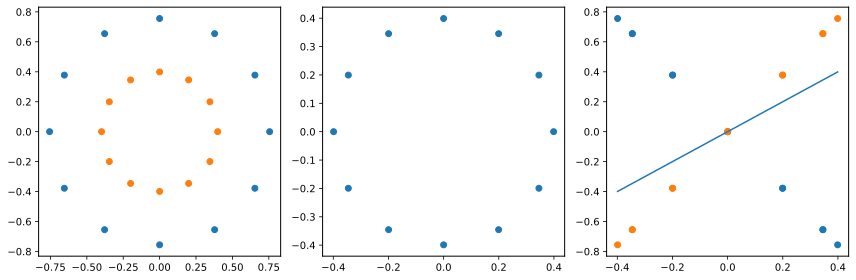

In [17]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

axes[0].scatter(real_part, imag_part)
axes[0].scatter(np.real(coef_phi_state), np.imag(coef_phi_state))
axes[1].scatter(np.real(coef_phi_state), np.imag(coef_phi_state))
axes[2].scatter(np.real(coef_phi_state), real_part)
axes[2].scatter(np.imag(coef_phi_state), imag_part)
axes[2].plot(np.linspace(-1/np.sqrt(np.pi*2), 1/np.sqrt(np.pi*2), 100), np.linspace(-1/np.sqrt(np.pi*2), 1/np.sqrt(2*np.pi), 100))

fig.tight_layout()

They form a circle! Indeed, the "eigenstate" of $\varphi$ has a nice analytical form, called the phase state. In the number basis,

\begin{align}
|\varphi\rangle = \dfrac{1}{\sqrt{2\pi}}\sum_{n=0}^{\infty}e^{in\varphi}|N\rangle
\end{align}

Below is the comparison of the eigenvalues of reconstructed $\varphi$ versus a "real" $\varphi$.

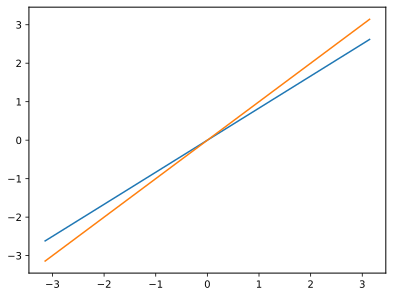

In [18]:
N0=5

plt.plot(np.linspace(-np.pi, np.pi, 2*N0+1), phi_val[:-1])
plt.plot(np.linspace(-np.pi, np.pi, 2*N0+1), np.linspace(-np.pi, np.pi, 2*N0+1))

### Using Fourier decomposition

Another idea is to use the Fourier decomposition of $\varphi$. The function is assumed to be periodic over $-\pi$ to $\pi$.

In [19]:
def fourier_series(x, terms):
    """Compute the Fourier series of f(x) = x with a given number of terms."""
    f_approx = np.zeros_like(x)
    for n in range(1, terms + 1):
        bn = 2 * (-1)**(n + 1) / n 
        f_approx += bn * np.sin(n * x)
    return f_approx

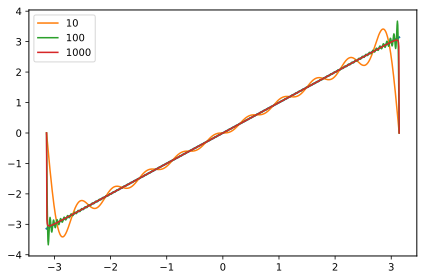

In [20]:
x = np.linspace(-np.pi, np.pi, 1000) 
f_original = x 
terms_list = [10, 100, 1000] 
approximations = [fourier_series(x, terms) for terms in terms_list]

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f_original, linewidth=2)

for terms, f_approx in zip(terms_list, approximations):
    ax.plot(x, f_approx, label=f'{terms}')

ax.legend()
fig.tight_layout()

This suggests we write the functional operator $f(\hat{\varphi})=\varphi$ on the interval $[-\pi,\pi]$ as
\begin{align}
\hat{\varphi}=\sum_{n=1}^\infty \frac{2(-1)^{n+1}}{n}\sin\left(n\hat{\varphi}\right)
\end{align}
Since we know how to write $\sin\left({n\hat{\varphi}}\right)$ in the charge basis, we can actually compute this sum:
\begin{align}
\sin\left({n\hat{\varphi}}\right)&=\frac{1}{2i}\left[\exp\left(i n\hat{\varphi}\right)-\exp\left(-i n\hat{\varphi}\right)\right],\\
&=\frac{1}{2i}\sum_{N=-\infty}^{\infty}|N+n\rangle\langle N|-|N\rangle\langle N+n|
\end{align}
Let's try to implement this...

In [21]:
def sin_op(n, N0):
    size = 2 * N0 - 1
    m = np.zeros((size, size), dtype=complex) 
    
    if n <= size:  
        diag_vals = (1 / (2 * 1j))
        np.fill_diagonal(m[n:], diag_vals)      
        np.fill_diagonal(m[:, n:], -diag_vals)  
    
    else:
        print("Warning: n > mat_size")
        
    return m

def cos_op(n, N0):
    size = 2 * N0 - 1
    m = np.zeros((size,size), dtype=complex)

    if n < size:
        diag_vals = (1/2)
        np.fill_diagonal(m[n:], diag_vals)
        np.fill_diagonal(m[:, n:], diag_vals)
    
    if n >= size:
        print("Warning: n >= mat_size")
    
    return m

def coef_fourier(n):
    return (2 * (-1) ** (n + 1) / n)

In [22]:
N0 = 500
mat_size = 2 * N0 - 1
varphi = np.zeros((mat_size, mat_size), dtype=complex)
coefs = []
num_terms = 999
for n in range(1, num_terms+1):  
    coefs.append(coef_fourier(n))
    varphi += coef_fourier(n) * sin_op(n, N0)
    
varphi = qt.Qobj(varphi)

In [23]:
varphi

Quantum object: dims=[[999], [999]], shape=(999, 999), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.+0.j         0.+1.j         0.-0.5j        ... 0.-0.00100402j
  0.+0.00100301j 0.-0.001002j  ]
 [0.-1.j         0.+0.j         0.+1.j         ... 0.+0.00100503j
  0.-0.00100402j 0.+0.00100301j]
 [0.+0.5j        0.-1.j         0.+0.j         ... 0.-0.00100604j
  0.+0.00100503j 0.-0.00100402j]
 ...
 [0.+0.00100402j 0.-0.00100503j 0.+0.00100604j ... 0.+0.j
  0.+1.j         0.-0.5j       ]
 [0.-0.00100301j 0.+0.00100402j 0.-0.00100503j ... 0.-1.j
  0.+0.j         0.+1.j        ]
 [0.+0.001002j   0.-0.00100301j 0.+0.00100402j ... 0.+0.5j
  0.-1.j         0.+0.j        ]]

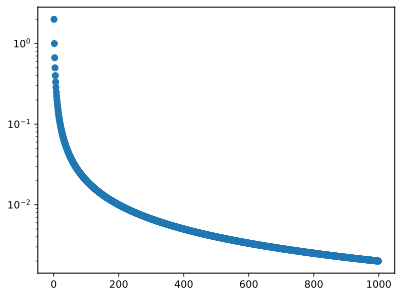

In [24]:
plt.scatter(range(1, num_terms+1), np.abs(coefs))
plt.yscale('log')

Let's try to calculate to $\cos$ of this $\varphi$.

In [25]:
mord_cos2p = (2*varphi).cosm()

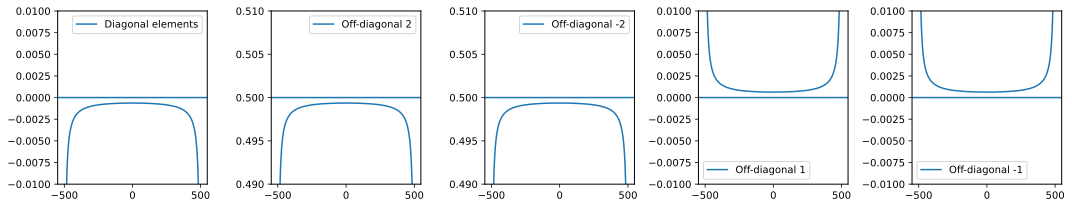

In [26]:
fig, axes = plt.subplots(ncols=5, figsize=(15, 3))

axes[0].plot(np.arange(-(N0-1), N0, 1), np.real(np.diagonal(mord_cos2p.full())), label='Diagonal elements')
axes[1].plot(np.arange(-(N0-2), (N0-1), 1), np.real(np.diagonal(mord_cos2p.full(), offset=2)), label='Off-diagonal 2')
axes[2].plot(np.arange(-(N0-2), (N0-1), 1), np.real(np.diagonal(mord_cos2p.full(), offset=-2)), label='Off-diagonal -2')
axes[3].plot(np.arange(-N0+1, N0-1, 1), np.real(np.diagonal(mord_cos2p.full(), offset=1)), label='Off-diagonal 1')
axes[4].plot(np.arange(-N0+1, N0-1, 1), np.real(np.diagonal(mord_cos2p.full(), offset=-1)), label='Off-diagonal -1')

for i in range(5):
    axes[i].legend()
    if i == 0 or i == 3 or i == 4:
        axes[i].set_ylim([-0.01, 0.01])
        axes[i].axhline(0)
    if i == 1 or i == 2:
        axes[i].set_ylim([0.49, 0.51])
        axes[i].axhline(0.5)

fig.tight_layout()

A feature of the $\cos2\varphi$ potential is that the diagonal elements should be zero. Here, we see that in the "middle" of the matrix, the diagonal elements are bounded below. They cannot reach zero. Another feature is that the 2nd off-diagonal elements should tend to 0.5, but here we see that they're also bounded above. From these 3 graphs, we conclude that the approximation is quite bad, and the $\log$ method should be favored instead.

# Software versions

In [27]:
for pkg in [np, matplotlib, qt]:
    print(f"{pkg.__name__}: {pkg.__version__}")

numpy: 2.2.1
matplotlib: 3.10.0
qutip: 5.1.0
